# Financial & Crypto Index for Beginners (Part 3)

Understanding and Constructing Crypto Indexes using Python

Welcome back to our tutorial series on Cryptocurrency Analysis with Python! In the first part of this tutorial `Financial & Crypto Index for Beginners `, we have investigated their fundamental aspects, composition, weightings, and the intricacies involved in their formation. Moreover, we have equipped ourselves with the knowledge and practical skills needed to create and analyze (using Python) three distinct types of crypto indices: Market Capitalization Weighted Index, Price Weighted Index, and Equal Weighted Index. In this third and final part (Part 3), we will analyze and compare the performance of these three Crypto Indices.


In the preceding parts, we've detailed the code for creating cryptocurrency indices [1]. In summary, the code below processes cryptocurrency data to derive three distinct weighted indices: market capitalization weighted (mcwi), price weighted (pwi), and equal weighted (ewi). It starts by reading data from a CSV file (accessible on my GitHub repository) and structuring it into a wide-format DataFrame. After calculating returns within a set range, the code then calculates the values of each index. The mcwi is based on market capitalization, the pwi is based on  price data, and the ewi employs an equal weighting methodology. These indices furnish valuable insights into the performance of diverse investment strategies, all grounded in historical cryptocurrency data.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.6f}'.format

# Load cryptocurrency data from a CSV file into a DataFrame
df = pd.read_csv("TotalCryptos.csv", parse_dates=["Date"], index_col="Date")

# Pivot the DataFrame using the "Symbol" column as columns, creating a wide-format representation.
convert = df.pivot(columns="Symbol")

# Extract Market Caps and Prices from the wide-format DataFrame
mar_caps = convert["Market Caps"]
prices = convert["Prices"]

# Calculate Simple Returns using percentage change and shift the values for alignment
returns = prices.pct_change().shift(-1)

# Clip (limit) the values of the 'returns' variable to be within the range of -1 to 100
returns.clip(lower=-1, upper=100, inplace=True)

# Market Capitalization Weighted Index (mcwi)
# Calculate the total or global market capitalization over time
total_cap = mar_caps.sum(axis ="columns")
# Calculate weights by dividing every coin market cap by the total market cap
weights_c = mar_caps.div(total_cap, axis="index")
# Calculate the market cap weighted index 
mcwi = returns.mul(weights_c).sum(axis="columns")

# Price Weighted Index (pwi)
# Calculate the total or global price over time
total_pric = prices.sum(axis ="columns")
# Determine the weights for each coin on each day
weights_p = prices.div(total_pric, axis="index")
# Calculate the price weighted index 
pwi = returns.mul(weights_p).sum(axis="columns")

# Equal Weighted Index (ewi)
# Determine the number of active coins on any given day
returns.notna().sum(axis="columns")
# Determine the weights 
weights_e = 1/returns.notna().sum(axis="columns")
# Calculate the price weighted index 
ewi = returns.mul(weights_e, axis="index").sum(axis="columns")

![](index3_1.png)

## Analysis and Comaprison of Crypto Indices

With all three indices created **market cap weighted**, **price weighted**, and **equally weighted** we are now ready to analyze and compare their performance.  

We have obtained the simple returns (see code below and part 2) for each of these indices, and we can combine them into a DataFrame using `pd.concat`. However, we should drop the last row where we have zeros (which should be missing values). This data cleaning step ensures that our analysis is accurate.


In [8]:
# Concatenate the three series into a DataFrame
indices_df = pd.concat([mcwi, pwi, ewi], axis=1)

# Drop the last row with zeros
indices_df = indices_df[:-1]

# Rename columns for clarity
indices_df.columns = ["Market Cap Weighted", "Price Weighted", "Equally Weighted"]

indices_df

,Market Cap Weighted,Price Weighted,Equally Weighted
Date,,,
2013-04-28,0.068210,0.068708,0.054084
2013-04-29,-0.036229,-0.036425,-0.030524
2013-04-30,-0.165214,-0.165601,-0.154140
2013-05-01,-0.090141,-0.090327,-0.084998
2013-05-02,-0.069847,-0.069012,-0.092544
...,...,...,...
2023-09-14,0.020729,0.020500,0.023473
2023-09-15,0.004666,0.005815,0.024933
2023-09-16,-0.002260,-0.002901,0.010400


Then we are going to take the returns, compound them to calculate the **index values**, and then normalize those values to have a consistent starting point of 100. This allows for a more intuitive comparison of the performance of the indices over time, as they all start from the same baseline value [2].

Adding 1 to the returns is necessary because when you compound returns, you need to add 1 to each return to account for the starting value of 100%.

In [9]:
# Calculate the indices by compounding the simple returns
indices_df = (indices_df + 1).cumprod()

# Normalize the indices to a base value of 100
indices_df = (indices_df / indices_df.iloc[0] * 100)
indices_df

,Market Cap Weighted,Price Weighted,Equally Weighted
Date,,,
2013-04-28,100.000000,100.000000,100.000000
2013-04-29,96.377056,96.357454,96.947566
2013-04-30,80.454262,80.400587,82.004085
2013-05-01,73.202069,73.138277,75.033940
2013-05-02,68.089142,68.090848,68.090007
...,...,...,...
2023-09-14,73669.204085,7159.673680,8370052607.072094
2023-09-15,74012.957768,7201.308748,8578740383.123271
2023-09-16,73845.661879,7180.419046,8667961032.718565


With the normalized prices, we can create a price chart to compare the three indices. It's evident that the equally weighted index outperforms the other two indices by a significant margin. **However, it's essential to note that the price weighted index is a fully self-rebalancing index by definition, while the market cap weighted index is partially self-rebalancing. In contrast, the equally weighted index assumes daily rebalancing, which incurs trading costs not accounted for in the index.**

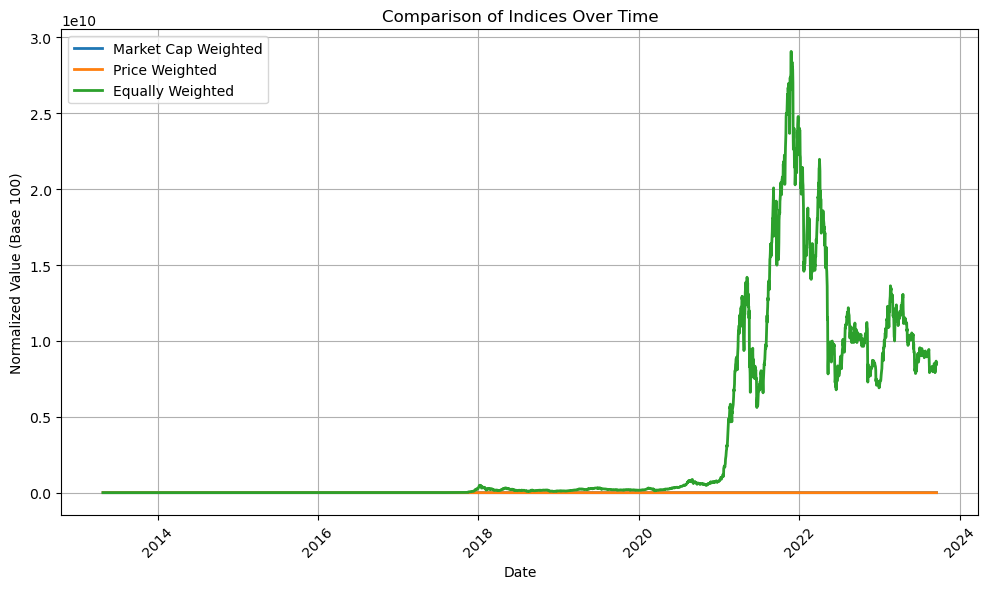

In [10]:
# Plot the indices
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(indices_df.index, indices_df['Market Cap Weighted'], label='Market Cap Weighted', linewidth=2)
plt.plot(indices_df.index, indices_df['Price Weighted'], label='Price Weighted', linewidth=2)
plt.plot(indices_df.index, indices_df['Equally Weighted'], label='Equally Weighted', linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Normalized Value (Base 100)')
plt.title('Comparison of Indices Over Time')

# Add a legend
plt.legend()

# Customize the grid and ticks
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensures that labels and titles fit within the figure
plt.show()

To enhance the visualization and highlight the distinctions among the three indices, we add `plt.yscale('log')`. This adjustment transforms the y-axis into a logarithmic scale, particularly beneficial when working with datasets that span a broad range of values.

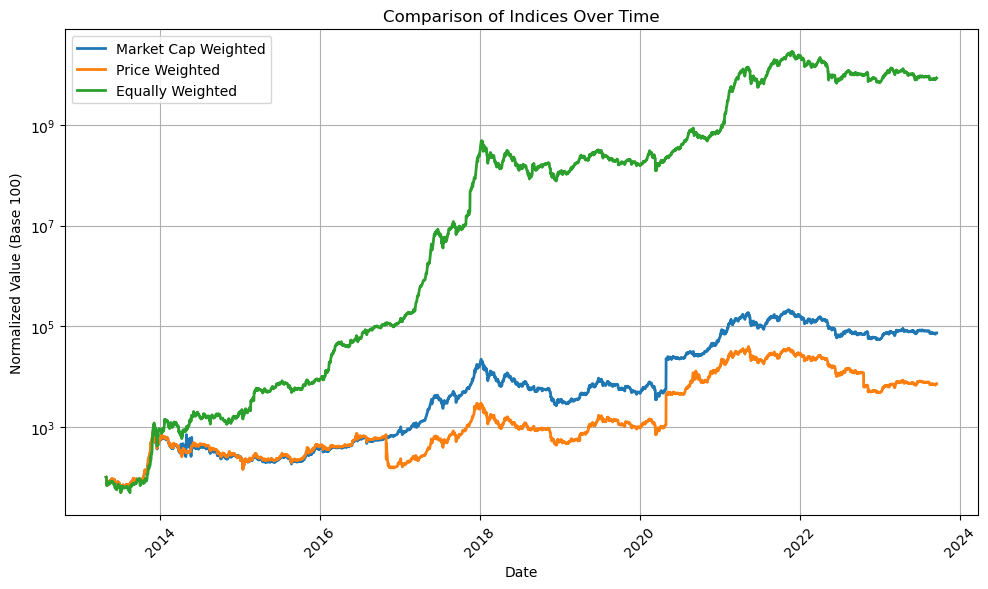

In [12]:
# Plot the indices
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(indices_df.index, indices_df['Market Cap Weighted'], label='Market Cap Weighted', linewidth=2)
plt.plot(indices_df.index, indices_df['Price Weighted'], label='Price Weighted', linewidth=2)
plt.plot(indices_df.index, indices_df['Equally Weighted'], label='Equally Weighted', linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Normalized Value (Base 100)')
plt.title('Comparison of Indices Over Time')

# Set the y-axis scale to logarithmic
plt.yscale('log')

# Add a legend
plt.legend()

# Customize the grid and ticks
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensures that labels and titles fit within the figure
plt.show()

It's important to note that the equally weighted index appears to outperform the other two. However, there are considerations to keep in mind:

- **The Equally Weighted Index assumes daily rebalancing**, which trigger trading costs not accounted for in the index. Therefore, if you want to create a portfolio that tracks the Equally Weighted Index, you need to consider trading costs.

- The dominance of Bitcoin is evident in both the Market Cap Weighted and Price Weighted Indices, as their weights are similar.

## Conclusion

In summary, this tutorial has taken us on a journey through the creation and analysis of three distinct cryptocurrency indices: the market capitalization weighted (mcwi), price weighted (pwi), and equally weighted (ewi) indices. We've covered the theoretical foundation of indices (Part 1), explored into the practical aspects of calculating indices and returns (Part 2), and concluded with the computation and visualization of index performance (Part 3). The standout performer among these indices has been the **equally weighted index**. However, it's essential to bear in mind that the ewi assumes daily rebalancing, incurring trading costs, which we did not calculate in this tutorial.

In essence, this tutorial equips us with the knowledge and tools needed to explore the world of cryptocurrency indices. It serves as a stepping stone for further exploration and the development of investment strategies within the dynamic cryptocurrency market.

References
[1] “What Is an Index? Examples, How It’s Used, and How to Invest,” Investopedia. https://www.investopedia.com/terms/i/index.asp (accessed Sep. 18, 2023).

[2] “Automated Cryptocurrency Portfolio Investing with Python A-Z,” Udemy. https://www.udemy.com/course/automated-cryptocurrency-portfolio-investing-with-python/ (accessed Apr. 01, 2023).